루브릭

1. 시계열의 안정성이 충분히 확인되었는가?  
플로팅과 adfuller 메소드 사용으로 시계열의 안정성이 (충분히) 확인되는 것을 시각화하였으며, 이에 대한 충분한 설명(해당 메소드에 대한 이해)이 서술되어있음
- <font color = 'blue'>STEP 3</font>
- <font color = 'blue'>**정성적 stationarity 분석**</font>
    - <font color = 'blue'>데이터의 stationarity가 보장되려면, 특정한 window size가 주어졌을 때, window의 평균(이동평균)과 표준편차 등이 시간에 의존하지 않고 일정해야 합니다.</font>
     - <font color = 'blue'>이를 위해, `plot_rolling_statistics` 함수를 사용해 이동평균과 표준편차의 그래프를 플로팅하고, 정성적으로 stationarity를 분석했습니다.</font>
     - <font color = 'blue'>이때 window size는 우리가 정할 수 있는 숫자이므로, 이 숫자를 바꿔가면서 실험해볼 수 있습니다.</font>
- <font color = 'blue'>**정량적 stationarity 분석**</font>
     - <font color = 'blue'>stationarity를 판단하는 대표적인 지표는 p-value입니다.</font>
     - <font color = 'blue'>더 정확하게 말하면, "이 time series가 stationary하다"라는 귀무가설에 대한 p-value를 의미합니다.</font>
     - <font color = 'blue'>p-value가 0.05 이하가 되면, 95% 이상의 confidence로 이 time series가 stationary하다고 말할 수 있습니다.</font>
     - <font color = 'blue'>p-value를 계산할 때에는, adfuller 메소드를 사용하여 정의한 `augmented_dickey_fuller_test`함수를 사용했습니다.</font>
     - <font color = 'blue'>원래의 데이터를 (1) 로그변환, (2) 시계열 분해(추세 상쇄하기, 계절성 상쇄하기) 등을 통해 가공하면서, p-value를 측정해 stationarity가 보장되는지를 확인합니다.</font>
     
 - <font color = 'blue'> 조사한 세 개의 주식 종목에 대해서는 (1), (2)의 가공을 거치고 나면 p-value가 0.05보다 훨씬 적은 값을 가진다는 것을 확인할 수 있었습니다.
    </font>


2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
- p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨
  - <font color = 'red'>STEP 5</font>
  - <font color = 'red'>  라이브러리`statsmodels.graphics.tsaplots`에서 제공하는 `plot_acf`, `plot_pacf` 함수를 사용하여, 로그변환까지 진행한 time series에 대하여 ACF(autocorrelation function)의 그래프와 PACF(partial autocorrelation function)의 그래프를 그렸습니다.</font>
  - <font color = 'red'>ACF, PACF를 이용해 p, q 결정하기</font>
    - <font color = 'red'>ACF와 PACF는 아래의 두가지 양상 중 하나의 양상으로 나타나는 경향이 있다고 합니다.</font>
    - <font color = 'red'>(a) ACF가 exponentially decrease하거나 sinusoidally decrease하고, PACF가 처음의 n개에서 significant spike를 가지고 이후에는 가지지 않는 경우</font>
    - <font color = 'red'>(b) PACF가 exponentially decrease하거나 sinusoidally decrease하고, ACF가 처음의 n개에서 significant spike를 가지고 이후에는 가지지 않는 경우</font>
    - <font color = 'red'>(a)의 경우, `p=n`, `q=0`으로 정합니다. (b)의 경우, `p=0`, `q=n`으로 정합니다.</font>
  - <font color = 'red'>차분안정성을 이용해 d 결정하기</font>
    - <font color = 'red'>시계열은 하나의 수열로 생각할 수 있다. 이 수열의 계차수열을 생각하면, 그것은 원래 시계열의 일차 차분(`diff_1`)이다.</font>
    - <font color = 'red'>마찬가지로 이차차분(`diff_2`)도 생각할 수 있다.</font>
    - <font color = 'red'>원래의 시계열이 stationary하지 않을 경우에 일차차분과 이차차분을 구하여, stationary한 데이터를 이끌어내도록 한다.</font>
    - <font color = 'red'>만약 일차차분이 제일 stationary하면 d=1로, 이차차분이 제일 stationary하면 d=2로 놓는다.</font>
    - <font color = 'red'>하지만, 이것들은 다분히 이론적인 것이고, 실제로는 여러 번 시험해보고 가장 stationary한 값을 d의 값으로 정하면 된다.</font>
  - <font color = 'red'>p, d, q를 정하는 것에 관해서는 여러 자료들을 찾아보았다.</font>
    - [8.17: How to pick the value of p in ARIMA models using ACF & PACF?](https://www.youtube.com/watch?v=_nSvoCkodS8)
    - [8.18: How to pick the value of q in ARIMA models using ACF & PACF?](https://youtu.be/a0BVTH86JrI)
    - [Quick way to find p, d and q values for ARIMA](https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/)
    - [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)
    - [시계열 분석- ARIMA 모델](https://velog.io/@sjina0722/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D-ARIMA-%EB%AA%A8%EB%8D%B8)

3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
- 3개 이상 종목이 MAPE 15% 미만의 정확도로 예측됨
  - <font color = 'green'>세 개의 종목에 대하여 모두 15% 이하의 MAPE 값이 나타납니다.</font>*


In [1]:
!pip install pandas-datareader

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import pandas_datareader.data as pdr
import yfinance

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [5]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

## 1. Apple 주가 예측

- `ts_log`
  - 정성적 stationarity 분석
    - window의 표준편차는 대체로 일정한 값을 유지하고 있지만, window의 평균(이동평균)은 조금씩 증가하는 경향을 보인다.
    - 따라서, `ts_log`는 stationary하지 않다고 생각할 수 있다.
  - 정량적 stationarity 분석
    - p-value는 0.80 정도로 나타난다.
    - 우리가 설정한 threshold인 0.05보다 훨씬 큰 값을 보이므로, `ts_log`는 전혀 stationary하지 않다고 말할 수 있다.
- `residual`
  - 정량적 stationarity 분석
    - p-value는 2.49e-16 정도로 나타난다.
    - 0.05보다 훨씬 작은 값을 보이므로, `residual`은 stationary하다고 말할 수 있다.
- `p`, `q` 선택
  - ACF의 그래프가 exponentially decrease한다고 정확하게 말하기는 어렵지만, 그렇게 가정하면, PACF 그래프가 두 개의 significant spike를 가지므로 `p=2`, `q=0`으로 두는 것이 맞을 것이다.
  그런데 `p=3`, `q=0`의 경우가 실험적으로 더 좋은 성능을 내므로 `p=3`, `q=0`로 둔다.
- `d` 선택
  - d=1과 d=2를 실험해봤을 때, d=1의 경우가 더 성능이 좋으므로 d=1을 선택한다.
- MAPE는 13.94%로 나타난다.

### STEP 1 : 시계열 데이터 준비

In [6]:
df = pdr.get_data_yahoo('AAPL')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-28,38.570000,38.174999,38.472500,38.320000,88022000.0,36.368187
2017-09-29,38.532501,38.000000,38.302502,38.529999,105199200.0,36.567490
2017-10-02,38.612499,38.180000,38.564999,38.452499,74795200.0,36.493938
2017-10-03,38.772499,38.477501,38.502499,38.619999,64921200.0,36.652901
2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.415642
...,...,...,...,...,...,...
2022-09-21,158.740005,153.600006,157.339996,153.720001,101696800.0,153.720001
2022-09-22,154.470001,150.910004,152.380005,152.740005,86652500.0,152.740005
2022-09-23,151.470001,148.559998,151.190002,150.429993,95939200.0,150.429993


In [7]:
ts = df['Close']

### STEP 2 : 각종 전처리 수행

In [8]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [9]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석

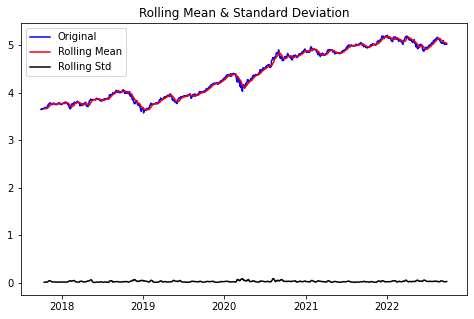

Results of Dickey-Fuller Test:
Test Statistic                   -0.876847
p-value                           0.795501
#Lags Used                        9.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64


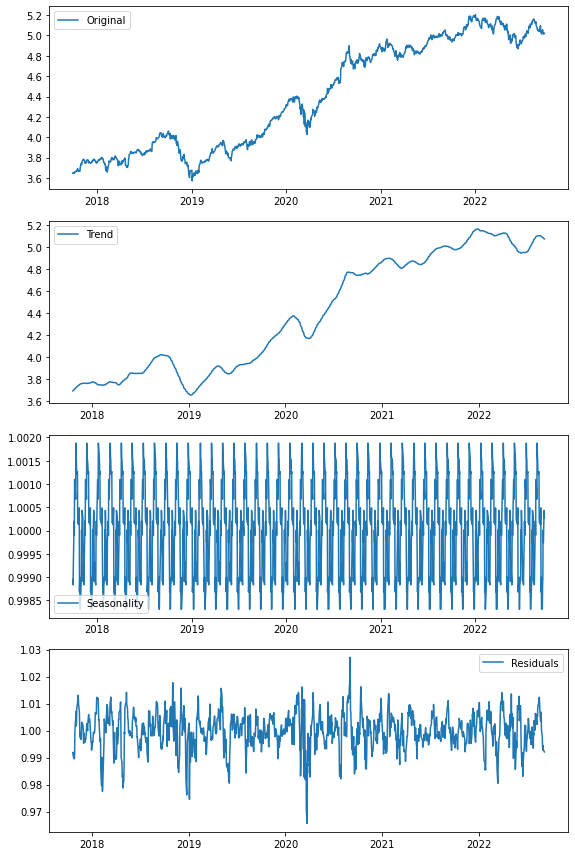

In [10]:
plt.rcParams["figure.figsize"] = (8,5)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (8,12)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [11]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -9.556646e+00
p-value                        2.488643e-16
#Lags Used                     1.900000e+01
Number of Observations Used    1.208000e+03
Critical Value (1%)           -3.435775e+00
Critical Value (5%)           -2.863936e+00
Critical Value (10%)          -2.568045e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

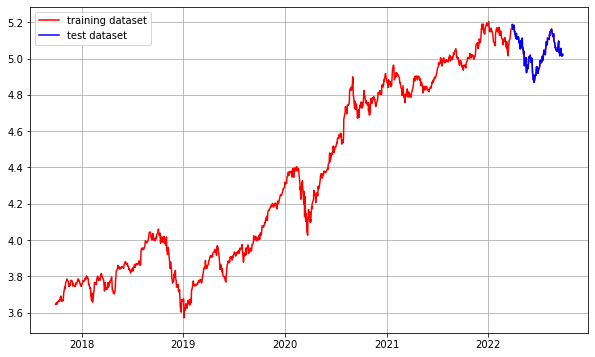

In [12]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


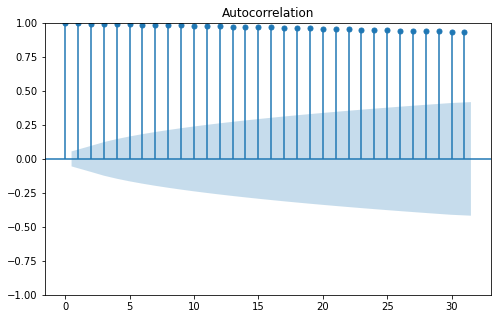

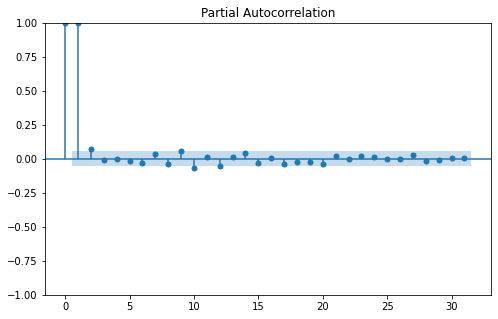

In [13]:
plt.rcParams["figure.figsize"] = (8,5)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.114593e+01
p-value                        3.026240e-20
#Lags Used                     8.000000e+00
Number of Observations Used    1.248000e+03
Critical Value (1%)           -3.435601e+00
Critical Value (5%)           -2.863859e+00
Critical Value (10%)          -2.568004e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.551676e+01
p-value                        2.310960e-28
#Lags Used                     1.700000e+01
Number of Observations Used    1.238000e+03
Critical Value (1%)           -3.435643e+00
Critical Value (5%)           -2.863877e+00
Critical Value (10%)          -2.568014e+00
dtype: float64


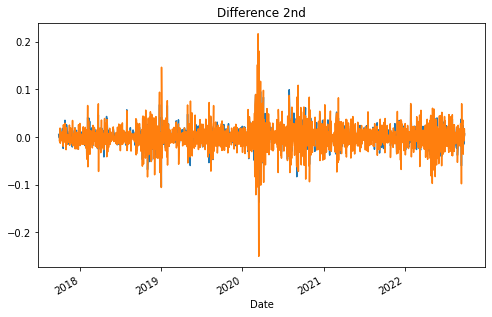

In [14]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


### STEP 6 : ARIMA 모델 훈련과 테스트

In [15]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(3, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1132
Model:                 ARIMA(3, 1, 0)   Log Likelihood                2812.324
Date:                Tue, 27 Sep 2022   AIC                          -5616.649
Time:                        23:11:29   BIC                          -5596.525
Sample:                             0   HQIC                         -5609.046
                               - 1132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1097      0.020     -5.614      0.000      -0.148      -0.071
ar.L2          0.0188      0.018      1.021      0.307      -0.017       0.055
ar.L3         -0.0117      0.021     -0.549      0.5

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


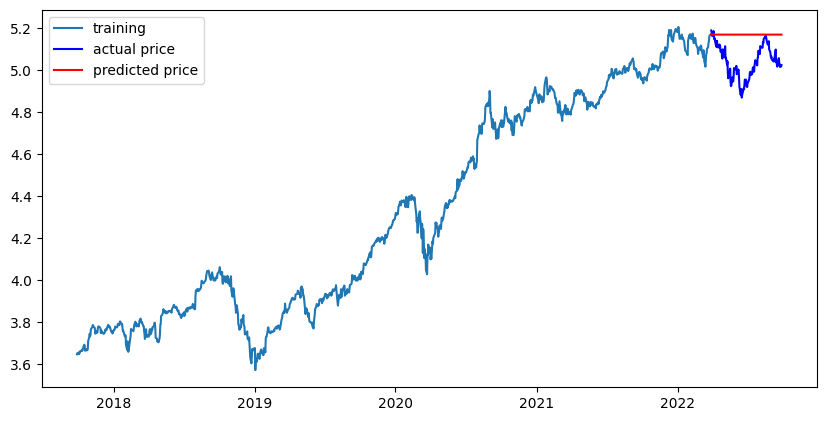

In [16]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  560.3455675617934
MAE:  20.57997331535878
RMSE:  23.67161945372123
MAPE: 13.94%


## 2.S&P 500 주가 예측

- `ts_log`
  - 정성적 stationarity 분석
    - window의 표준편차는 대체로 일정한 값을 유지하고 있고, window의 평균(이동평균)은 일정한 구간 안에서 횡보하는 경향을 보인다.
    - 따라서, `ts_log`는 stationary하지 않다고 생각할 수 있다.
  - 정량적 stationarity 분석
    - p-value는 0.52 정도로 나타난다.
    - 이 값은 `AAPL`의 경우보다는 적은 값이기는 하지만, 0.05보다 훨씬 큰 값을 보이므로, `ts_log`는 stationary하지 않다고 말할 수 있다.
- `residual`
  - 정량적 stationarity 분석
    - p-value는 6.42e-19 정도로 나타난다.
    - 0.05보다 훨씬 작은 값을 보이므로, `residual`은 stationary하다고 말할 수 있다.
- `p`, `q` 선택
  - ACF의 그래프가 exponentially decrease한다고 정확하게 말하기는 어렵지만, 그렇게 가정하면, PACF 그래프가 2-4개의 significant spike를 가지므로 `p=2, 3, 4`, `q=0`으로 두는 것이 맞을 것이다.
  그런데 `p=4`인 경우가 실험적으로 가 좋은 성능을 내므로 `p=4`, `q=0`로 둔다.
- `d` 선택
  - d=1과 d=2를 실험해봤을 때, d=1의 경우가 더 성능이 좋으므로 d=1을 선택한다.
- MAPE는 12.94%로 나타난다.

### STEP 1 : 시계열 데이터 준비

In [18]:
df = pdr.get_data_yahoo('^GSPC')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-28,2510.810059,2502.929932,2503.409912,2510.060059,3168620000,2510.060059
2017-09-29,2519.439941,2507.989990,2509.959961,2519.360107,3211920000,2519.360107
2017-10-02,2529.229980,2520.399902,2521.199951,2529.120117,3199730000,2529.120117
2017-10-03,2535.129883,2528.850098,2530.340088,2534.580078,3068850000,2534.580078
2017-10-04,2540.530029,2531.800049,2533.479980,2537.739990,3017120000,2537.739990
...,...,...,...,...,...,...
2022-09-21,3907.070068,3789.489990,3871.399902,3789.929932,4078330000,3789.929932
2022-09-22,3790.899902,3749.449951,3782.360107,3757.989990,4284600000,3757.989990
2022-09-23,3727.139893,3647.469971,3727.139893,3693.229980,5144270000,3693.229980


In [19]:
ts = df['Close']

### STEP 2 : 각종 전처리 수행

In [20]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [21]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석

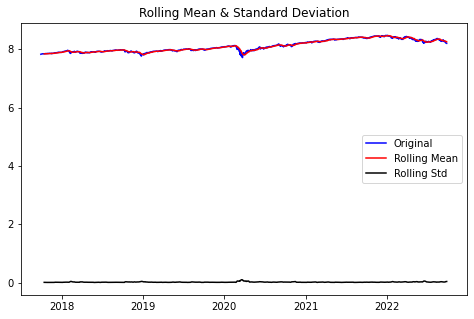

Results of Dickey-Fuller Test:
Test Statistic                   -1.524661
p-value                           0.521279
#Lags Used                        9.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64


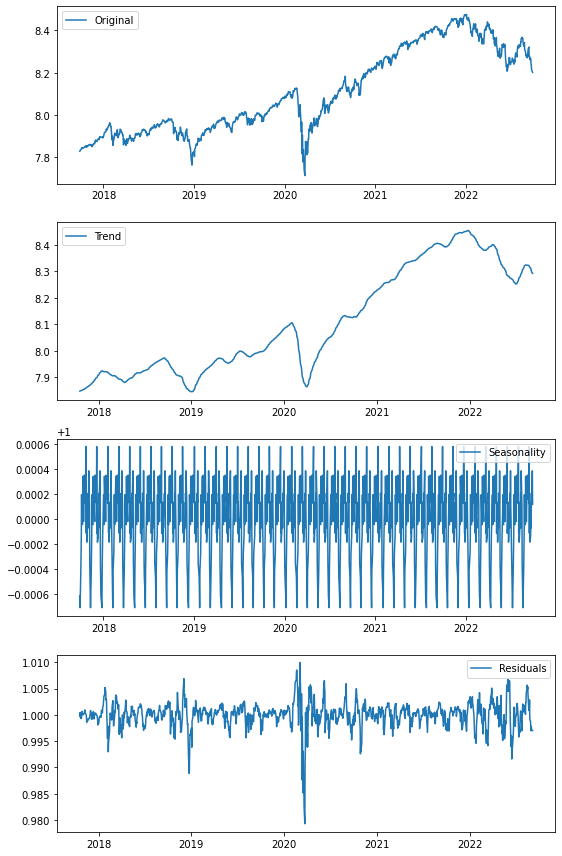

In [22]:
plt.rcParams["figure.figsize"] = (8,5)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (8,12)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [23]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.059412e+01
p-value                        6.415073e-19
#Lags Used                     2.100000e+01
Number of Observations Used    1.206000e+03
Critical Value (1%)           -3.435784e+00
Critical Value (5%)           -2.863940e+00
Critical Value (10%)          -2.568048e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

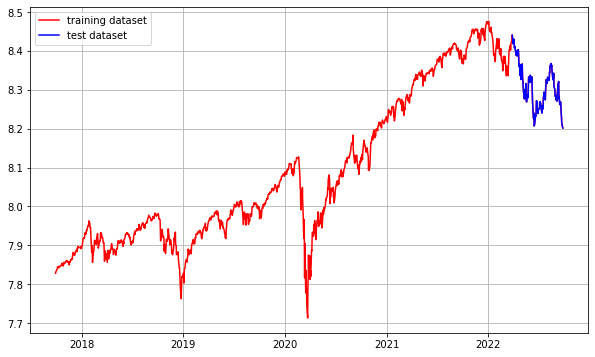

In [24]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


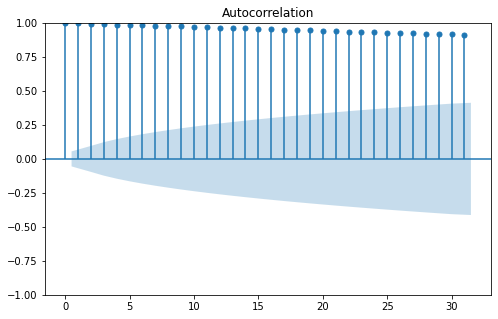

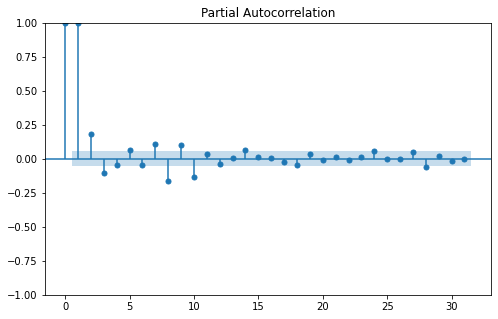

In [25]:
plt.rcParams["figure.figsize"] = (8,5)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.056907e+01
p-value                        7.385478e-19
#Lags Used                     8.000000e+00
Number of Observations Used    1.248000e+03
Critical Value (1%)           -3.435601e+00
Critical Value (5%)           -2.863859e+00
Critical Value (10%)          -2.568004e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.317218e+01
p-value                        1.243950e-24
#Lags Used                     1.900000e+01
Number of Observations Used    1.236000e+03
Critical Value (1%)           -3.435652e+00
Critical Value (5%)           -2.863881e+00
Critical Value (10%)          -2.568016e+00
dtype: float64


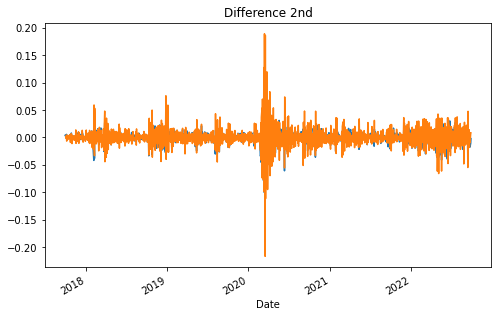

In [26]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


### STEP 6 : ARIMA 모델 훈련과 테스트

In [27]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(3, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1132
Model:                 ARIMA(3, 1, 0)   Log Likelihood                3334.309
Date:                Tue, 27 Sep 2022   AIC                          -6660.618
Time:                        23:11:33   BIC                          -6640.494
Sample:                             0   HQIC                         -6653.015
                               - 1132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1990      0.012    -17.186      0.000      -0.222      -0.176
ar.L2          0.1235      0.011     10.750      0.000       0.101       0.146
ar.L3          0.0487      0.013      3.676      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


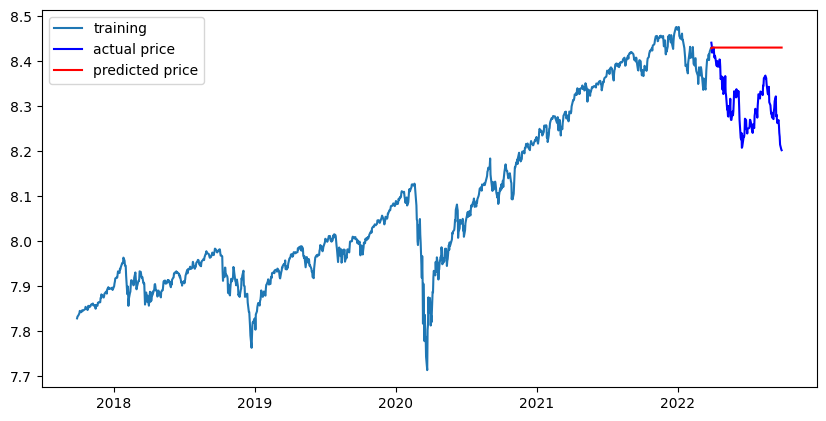

In [28]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  319987.5344346629
MAE:  518.4395815646033
RMSE:  565.6744067347072
MAPE: 13.10%


## 3. Dow Jones 주가 예측

- `ts_log`
  - 정성적 stationarity 분석
    - window의 표준편차와 평균(이동평균) 모두 대체로 일정한 값을 유지하고 있다.
    - 따라서, `ts_log`는 어느 정도는 stationary하다고 추측할 수 있다.
  - 정량적 stationarity 분석
    - p-value는 0.30 정도로 나타난다.
    - 우리가 설정한 threshold인 0.05보다 큰 값을 보이므로, `ts_log`는 stationary하지 않다고 말할 수 있다.
- `residual`
  - 정량적 stationarity 분석
    - p-value는 1.00e-19 정도로 나타난다.
    - 0.05보다 훨씬 작은 값을 보이므로, `residual`은 stationary하다고 말할 수 있다.
- `p`, `q` 선택
  - ACF의 그래프가 exponentially decrease한다고 정확하게 말하기는 어렵지만, 그렇게 가정하면, PACF 그래프가 2-4 개의 significant spike를 가지므로 `p=2,3,4`, `q=0`으로 두는 것이 맞을 것이다.
  그런데 `p=2`, `q=0`의 경우가 실험적으로 더 좋은 성능을 내므로 `p=2`, `q=0`로 둔다.
- `d` 선택
  - d=1과 d=2를 실험해봤을 때, d=1의 경우가 더 성능이 좋으므로 d=1을 선택한다.
- MAPE는 8.30%로 나타난다.

### STEP 1 : 시계열 데이터 준비

In [30]:
df = pdr.get_data_yahoo('^DJI')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-28,22394.740234,22288.970703,22306.830078,22381.199219,263010000,22381.199219
2017-09-29,22405.630859,22332.960938,22358.470703,22405.089844,274790000,22405.089844
2017-10-02,22559.380859,22416.000000,22423.470703,22557.599609,268530000,22557.599609
2017-10-03,22646.320312,22562.900391,22564.449219,22641.669922,238830000,22641.669922
2017-10-04,22685.939453,22632.800781,22645.669922,22661.640625,235730000,22661.640625
...,...,...,...,...,...,...
2022-09-21,31020.789062,30181.990234,30819.390625,30183.779297,354960000,30183.779297
2022-09-22,30302.279297,29994.529297,30204.519531,30076.679688,335270000,30076.679688
2022-09-23,29955.650391,29250.470703,29955.650391,29590.410156,388200000,29590.410156


In [31]:
ts = df['Close']

### STEP 2 : 각종 전처리 수행

In [32]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [33]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석

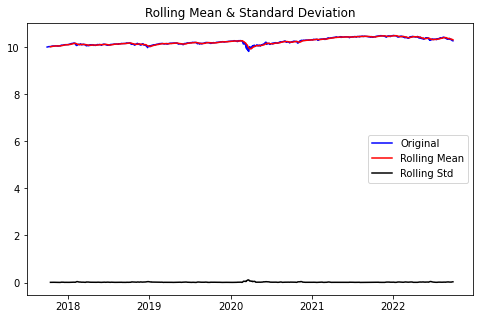

Results of Dickey-Fuller Test:
Test Statistic                   -1.959439
p-value                           0.304636
#Lags Used                       10.000000
Number of Observations Used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64


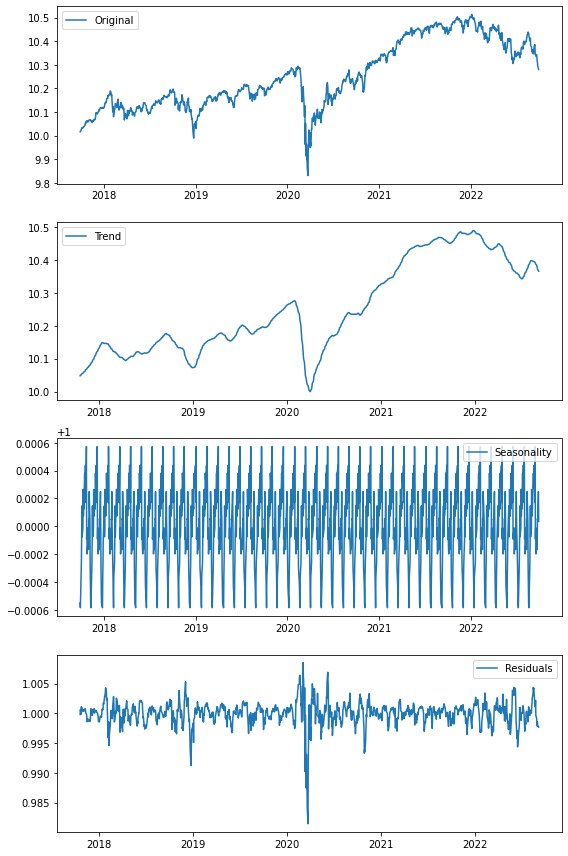

In [34]:
plt.rcParams["figure.figsize"] = (8,5)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (8,12)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [35]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.092867e+01
p-value                        9.951285e-20
#Lags Used                     1.700000e+01
Number of Observations Used    1.210000e+03
Critical Value (1%)           -3.435766e+00
Critical Value (5%)           -2.863932e+00
Critical Value (10%)          -2.568043e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

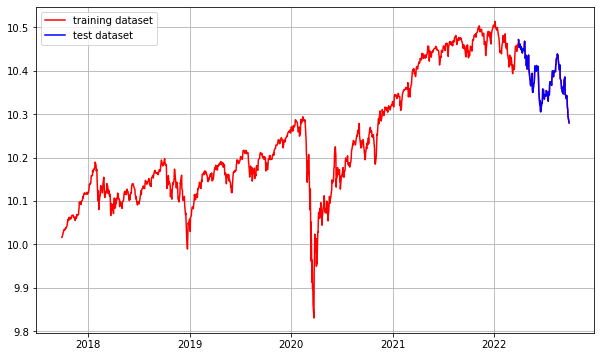

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


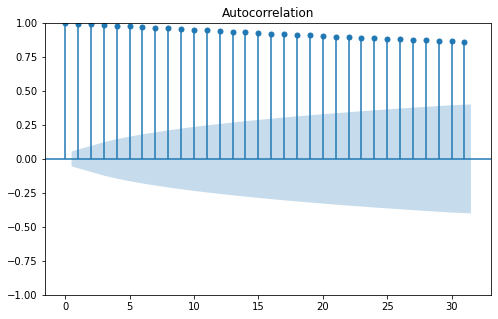

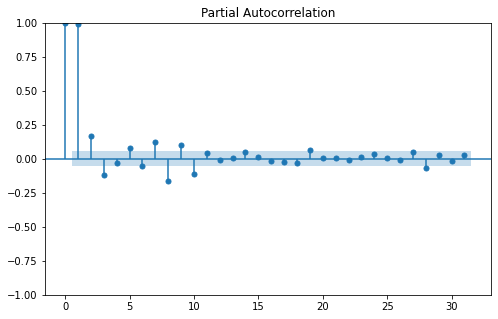

In [37]:
plt.rcParams["figure.figsize"] = (8,5)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.085838e+01
p-value                        1.467691e-19
#Lags Used                     9.000000e+00
Number of Observations Used    1.247000e+03
Critical Value (1%)           -3.435605e+00
Critical Value (5%)           -2.863861e+00
Critical Value (10%)          -2.568005e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.194618e+01
p-value                        4.424815e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.232000e+03
Critical Value (1%)           -3.435669e+00
Critical Value (5%)           -2.863889e+00
Critical Value (10%)          -2.568021e+00
dtype: float64


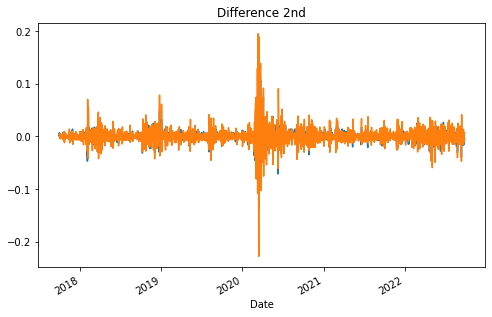

In [38]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)


### STEP 6 : ARIMA 모델 훈련과 테스트

In [39]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1132
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3292.988
Date:                Tue, 27 Sep 2022   AIC                          -6579.976
Time:                        23:11:37   BIC                          -6564.883
Sample:                             0   HQIC                         -6574.274
                               - 1132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1768      0.011    -16.665      0.000      -0.198      -0.156
ar.L2          0.1347      0.010     13.408      0.000       0.115       0.154
sigma2         0.0002   2.31e-06     74.928      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


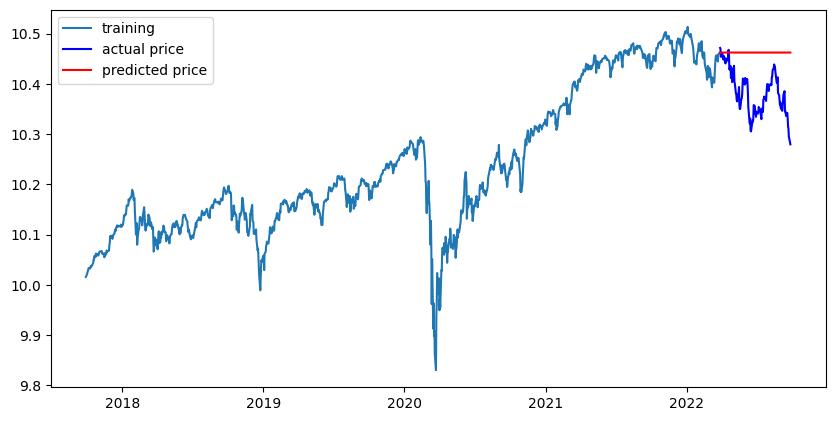

In [40]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  8822607.89828685
MAE:  2620.9039991646437
RMSE:  2970.287511047853
MAPE: 8.30%


**회고**

1. trivia

처음으로 회고를 쓴다.
회고를 쓰는 것은, 공자시항에 '회고를 꼭 적어달라'는 요청이 있었기도 하고, 며칠 전 두 명의 선배(2022년 2기)분들이 추천하셨기 때문이기도 하다.

지금까지 두 개의 exploration을 제출했다.
하나 아쉬운 것은 exploration 3를 제출하지 못한 것 같다는 것이다.
나는 제출일이 지난 주 토요일(9/24)까지인 줄 알고 있었는데, 이상하게 그날 LMS에 접속해보니, 제출일이 지났다고 떴다.
전날은 시간도 없었거니와, 자주 LMS 서버가 다운되어서 제출하기 힘들었던 점도 있었는데, 이렇게 제출하지 못하게 되어 정말 아쉽다.

지금까지 첫번째의 exploration에 대해서만 채점이 완료되었다.
나는 별 두 개를 받았는데, 납득할 수 없는 점수였다.
별을 못받은 항목에 대하여 내가 못한 것이 없다고 생각했기 때문이다.
이의를 제기했고, 캠퍼스매니저님이 말씀하시길, 채점할 때에 404 error가 떴고, 대신 해당 깃허브 주소의 다른 파일들로 추적해 채점을 하였으며, 그 과정에서 최종본이 아닌 중간본을 채점하셨다는 것이다.
나 말고도 몇몇 그루분들이 나와 같은 경우가 있었다.
결론은, "단 하나의 파일이 포함된, 안정적인 링크를 올려라"라는 것이다.
그리하여, exploration 4부터는 아예 새로운 곳에 올리기로 했다.
정확하게는, repository를 새로 하나 파고 (`aiffel_explorations`), 거기에는 한 exploration당 하나의 파일만을, 숫자의 형태로 (e.g. `04.ipynb`) 올릴 것이다.
그리고 이 파일이 `aiffel_explorations` repository의 첫번째 파일이다.

모든 걸 작업해놓고 다 날렸다.
수정사항이 github에 잘 안올라가기에, 깃헙의 repository를 삭제하고 다시 만들었는데, 그 과정에서 작업한 것이 다 날아갔다.
LMS 서버에는 남아있을 거라고 생각했는데, 그렇지 않았다.
이걸 하느라 밤을 샜는데 (밤을 새리라고는 생각하지 못했다, 거의 완성했다고 생각했기 때문이다.) 기억을 더듬어서 재빨리 복구했다. 그래도 머릿속에 과정들이 남아 있어서 다행이다.
오늘은, 아니 어제는 데이터톤이 진행되었었다.

2. ARIMA

이 exploration 노드는, 지난 주 화요일엔 진행되었던 노드인데, 당일에 바로 프로젝트를 완성하지 못했다.
완성하기는 커녕, 관련된 개념을 완전히 익히지도 못했다.
이 노드의 핵심은 ARIMA 모델이다.

나는 대학원에 있을 때, LSTM timeseries prediction을 해본 적이 있다.
하지만, 나를 지도해주셨던 몇몇 교수님들은, 사실 해당 부분들에 대해서 아주 자세히 알고 계시지 못하였다.
그러니까, 내가 혼자 헤쳐나가야 했었던 셈이다.
그때 처음으로 ARIMA 모델을 본 적이 있다.
정확하게는, GRU인가 LSTM모델이 특정 머신러닝 문제에 대하여, baseline인 ARIMA에 비해 괜찮은 성능을 보였다는 논문을 읽은 적이 있다.
그래서, ARIMA 모델이라는 게 도대체 뭔가, 하고 의문을 가졌었다.
학부 과정의 '시계열 분석'이라는 수업을 청강하기도 했었다. (하지만, 이내 두번인가 세 번만 듣고, 바빠서 더 듣지 못했고, 도움이 되지 못했다.)

그리고 시간이 지나, 이번 기회에 aiffel 노드에서 ARIMA 모델에 대해 공부하게 되었다.
솔직히 말하면, 아직도 잘 모르겠다.
이것을 정확하게 알려면, 내가 청강하려고 했었던 그 수업을 열심히 들을 정도의 노력을 기울여야 정확히 이해할 것이라고 생각된다.
하지만 나는 단지, 단 사흘 정도를 고민했으니(지난 주 화요일과 토요일 그리고 오늘) 완전히 이해가 안 가는 것도 당연할지도 모르겟다.

그래도, 조금은 알게 되었다.
ARIMA 모델은 세 개의 submodel AR, I, MA을 결합한 모델이라는 것(정확한 표현이 아닐 수 있다.), 그리고 각각의 submodel들에는 특정한 인자들 p, d, q가 지정된다는 것 등이다.

3. ACF, PACF, p, q

ACF와 PACF가 뭔지는 아직도 전혀 모르겠지만, 그래도 p, q를 결정하는 방법은 다음과 같다.
ACF가 exponentially decrease하거나 sinusoidally decrease하면 q=0으로 둔 채로 p값을 정한다.
p값을 정할 때에는 PACF에서 significant spike들의 개수를 세어 그것을 p값으로 정한다.
반대로, PACF가 exponentially decrease하거나 sinusoidally decrease하면 p=0으로 둔 채로 q값을 정한다.
q값을 정할 때에는, 마찬가지로 ACF에서 significant spike들의 개수를 세어 그것을 q값으로 정한다.

이상한 것은, 내가 해본 모든 주식자료들은 모두 ACF가 exponentially decrease한다는 것이다.
정확히 말하면, ACF를 exponentially decrease한다고 말하는 것 외에 다른 표현방법을 찾지 못했다.
그러니까 exponentailly decrease한다고 말하기에는 decay가 너무 적어보이는데, 이 두 그래프를 달리 해석할 방법이 없어서, 나는 그냥 ACF를 exponentially decrease한다고 판단한 것이다.
어쨌든 적어도 ACF가 sinusoidally decrease하지는 않고, 맨 위에 적은 두 개의 케이스 (a) q=0, (b) p=0 중에서 (b)의 케이스는 아닌 것으로 판단하고 있다.

하지만, 임의로 (b) p=0으로 설정하여 ARIMA 모델을 돌리더라도, 크게 MAPE 값이 변하지는 않는다. 심지어는 (a)의 경우로 판단했는데도 불구하고 실험적으로는 p=0으로 두는 것이 MAPE 값이 더 잘나오는 경우도 있었다.

그래도 대체로는, p, q를 구하는 criteria를 따르는 것이 괜찮은 MAPE 값을 얻는 방법이라고 여겨진다.

4. differencing, d

또하나의 인자인 d는 차분(differencing)과 관련되어 있다.
이것은 미분의 개념과는 조금 다르지만, 비슷하게 생각할 수 있겠다.
조금 더 정확하게는, 함수의 미분이라기보다는, 수열에 대한 계차수열 개념이라고 보면 더 정확하겠다.
응용수학 분야에서는 미분의 개념을 뺄셈의 개념으로 치환하는 경우가 종종 있는 것 같은데, 그 한 예가 이것인 것 같다.

d=1은 주어진 time series를 한번 차분한 것이다.
그러니 d=2는 차분을 한번 더 한 것이다.
사실, d=0으로 설정하고 ARIMA 모델을 돌리는 것도 가능했었는데, d=0이 성능이 더 잘 나오는 경우도 있었다.
하지만 d=0은 루브릭의 instruction에 없었으므로 d=1과 d=2만 시행했다.
그리고, d=1인 경우가 항상 d=2인 경우보다 잘 나오는 모습을 보였다.

5. 기타

데이터를 불러오는 데에는 `yhfinance`와 `pandas_datareader`를 사용했다.
이 두 모듈은 LMS 서버에 저장되어 있지 않았기 때문에 따로 다운받아야 했다.
이것들을 사용하게 된 데에는, 몇 주 전 경원 퍼실님께서 주식 데이터 미션을 주셨던 것과 연관이 있다.
이것들을 이전에 다루어본 적은 있지만, 퍼실님께서 미션을 주셨을 때에 한 번 다시 연습해봤기 때문에 망설임 없이 사용할 수 있었다.

예측 결과들은, 사실 만족스러워보이지 않는다.
예측된 값들은 이상하게 linear한 형태로만 예측된다.
LMS에서는 조금 더 깔끔한 형태로 예측되기도 했었던 것 같은데, 왜 여기서는 그렇게 되지 않는지 아직 잘 모르겠다.

밤새서 이 자료를 만들었는데, 한 번 다 날렸다. 다행히 거의 다 복구해가고 있는 듯하다.

6. 결과요약.

결과를 간략하게 표로 요약해보자.

|section |종목    |(p,d,q)  |MAPE  |비고|
|     :-:|     :-:|      :-:|   :-:| :-:|
|1       |애플    |(3,1,0)  |13.94%|성공|
|2       |S&P500  |(4,1,0)  |12.94%|성공|
|3       |다우존스|(2,1,0)  | 8.30%|성공|

7. p-value

p-value의 진정한 의미에 대해서는, 처음에는 잘 이해하지 못하다가, 루브릭 1을 만족시키는 자료를 만들려다 보니 이해하게 되었다.

사실 이전부터 확률과정(stochastic process)에서의 stationarity 같은 건 들어본 적이 있다.
나는 확률과정개론같은 걸 열심히 공부해본 적이 없었으므로 깊게 파본 것은 전혀 아니고 정말 지나가다가 들어본 적이 있다.
그러한 stationarity를 수학적으로 정의하는 것은 의미있는 일이지만, 그것은 차차 나중에 공부하기로 하고, stationarity를 정성적으로 정의하는 방식이 흥미로웠다.
요는, stationarity가 통계적인 여러 모수(e.g. 평균, 분산, autocorrelation)들이, 시간에 depend하지 않는 것에 관련된 개념이라는 것이다.

이러한 stationarity를 판단하기 위한 판정법이 소개되었다.
그것은 귀무가설과 대립가설을 이용한 판정법이다.
"주어진 time series가 stationary하지 않다"라는 귀무가설을 세운 후, 이 귀무가설이 신빙성이 있느냐 하는 정도를 p-value로 표현했다.
다시 말하면, p-value의 값이 적은 것이 주어진 time series가 stationary하다는 사실에 대응된다.
우리는 여러 전처리를 통해서 time series를 stationary하게 만들려고 노력하고, 그 과정에서 p-value를 계속 체크한다.
마침내 p-value가 특정 값(threshold, 0.05)보다 작게 측정되었을 때, 비로소 귀무가설을 폐기하고 대립가설인 "times series가 stationary하다"을 차용할 수 있는 것이다.